<a href="https://colab.research.google.com/github/Firojpaudel/Machine-Learning-Notes/blob/main/Practical%20Deep%20Learning%20For%20Coders/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a Digit Classifier

In [1]:
#First initializing the notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
from fastbook import *

### **Lesson 1:** How images are represented in a computer:

For the initial learning, I'm just creating a model that classifies any image as *3 or 7*. Before that, downloading a sample of MNIST that contains images of just these digits

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
## Checking the directory
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [6]:
## Checking what's inside the training set
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

So, yeah! there are images of 7 and 3 in the training set. The images inside these folders are labelled accordingly.

In [7]:
## Taking a look in these folders to check the images.
three = (path/'train'/'3').ls().sorted()
seven= (path/'train'/'7').ls().sorted()

In [8]:
three

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [9]:
seven

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

They are all full of .png files.


In [10]:
## Taking a look at one of them
img3 = Image.open(three[0])
img3

In computer as we know all data is represented as a number, we have to convert the images into an array or tensor before model training.

In [11]:
## Converting to array
array(img3)

'''
This is similar to doing:
array = np.array(img3)
array

'''

'\nThis is similar to doing:\narray = np.array(img3)\narray\n\n'

In [12]:
#@ Side learnings:
#@ If we wish to see the array from particular index in both rows and columns, we could do like:
np.array(img3)[4:10,4:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [13]:
## Now, in pytorch, it's kinda different. We have tensors instead of arrays
tensor(img3)[4:10, 4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

Also, we could do sth like color coding in pandas.

In [14]:
#@ Visualizing in pandas
df= pd.DataFrame(tensor(img3)[3:13, 9:19])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,42,118,219,166,118,118,6,0
2,0,103,242,254,254,254,254,254,66,0
3,0,18,232,254,254,254,254,254,238,70
4,0,0,104,244,254,224,254,254,254,141
5,0,0,0,207,254,210,254,254,254,34
6,0,0,0,84,206,254,254,254,254,41
7,0,0,0,0,24,209,254,254,254,171
8,0,0,0,91,137,253,254,254,254,112
9,0,40,214,250,254,254,254,254,254,34


#### **First Try:** Pixel Similarity


* Step1: Would be to get the average of pixel values for each of our two groups

In [15]:
#@ Creating tensors containg a single image
seven_tensors = [tensor(Image.open(o)) for o in seven]
three_tensors = [tensor(Image.open(o)) for o in three]

#@ Checking the lengths of these created tensors
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

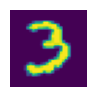

In [16]:
#! Just checking the tensor:
show_image(three_tensors[4])

In [17]:
#@ Now stacking
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

#@ Checking the Shape
stacked_threes.shape

torch.Size([6131, 28, 28])

**The meaning of this output:**<br>
It's trying to say that we have 6,131 images, each of size 28×28 pixels.


<details>
  <summary>
    <b>The reason behind converting to float and dividing by 255</b>
  </summary>
- Some of the operations in PyTorch, such as taking means, require us to cast our integer types into float types. So, converting the stacks to float as well.<br>
- When converted to float, the pixel values are also expected to be in between 0 to 1. So dividing by 255.  
</details>

In [18]:
#@ Gettig the rank of the tensor
len(stacked_threes.shape)

'''
This is similar to doing:
stacked_threes.shape
'''


'\nThis is similar to doing:\nstacked_threes.shape\n'

##### **Ranks defined**:
\- Here's what the rank of tensors mean:
  - **Rank 0**= Scalar, *real number or constant*
  - **Rank 1**= Vector, *can be represente as list of values*
  - **Rank 2**= Matrix, *to represent 2D data structures*
  - **Rank 3**= 3D Tensor, *cube or stack of matrices*
  - **Rank 4**= 4D Tensor, *to represent images in batch form: where the 4th dimension reprents the batch size*




<Axes: >

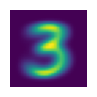

In [19]:
#@ Now computing the mean and looking at what we should be expecting for peak image for 3 (for classification)
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

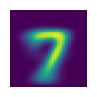

In [20]:
#@ Doing the same for seven
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

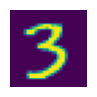

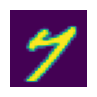

In [21]:
## Just picking an arbitary 3s or 7s and seeing how far are we from the "ideal digits"
arb_3 = stacked_threes[1]
show_image(arb_3)

arb_7 = stacked_sevens[1]
show_image(arb_7)

<details>
  <summary>
    Measuring the distances:
  </summary>
- Take the mean of absolute value of differences. Also called as <i>L1 Norm</i> <br>
- Then find the Root Mean Sqaured Error (RMSE). Also called as <i>L2 Norm</i>
</details>

In [22]:
#@ Implementing the above information

dist_3_abs = (arb_3 - mean3).abs().mean() #L1 Norm
dist_3_sqr = ((arb_3 - mean3)**2).mean().sqrt() #L2 Norm
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [23]:
dist_7_abs= (arb_7 - mean7).abs().mean()
dist_7_sqr= ((arb_7 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1304), tensor(0.2585))

In [24]:
#@ Now implementing the same using loss functions.
import torch.nn.functional as F

F.l1_loss(arb_3.float(), mean3), F.mse_loss(arb_3, mean3).sqrt() #l1 stands for L1 Norm and mse is just L2 Norm

(tensor(0.1114), tensor(0.2021))

##### Numpy Arrays and PyTorch tensors

So, in this part it's just a revision about what Numpy arrays and tensors are.

<details>
  <summary>
    <b>Why use Numpy arrays?</b>
  </summary>
Since they are built using optimized C code, Numpy arrays are way way faster than the python code.
</details>

<details>
  <summary>
    <b>Why PyTorch Tensors?</b>
  </summary>
They do the same task as Numpy array. Just more specified with GPUs.
</details>